In [1]:
from glob import glob

import anndata
import pandas as pd
import plotnine as p
from scipy import sparse

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fes = []
res = []
for fname in glob('tfp/run*/fixed_effects.csv'):
    fit_number = fname.split('run')[-1].split('\\')[0]
    fe = pd.read_csv(fname, index_col = 0)
    fe['fit_number'] = fit_number
    
    re = pd.read_csv(fname.replace('fixed', 'random'), index_col = 0)
    re['fit_number'] = fit_number
    
    fes.append(fe)
    res.append(re)
    
tfp_fixed_effects = pd.concat(fes)
tfp_random_effects = pd.concat(res)

In [3]:
lme4_fixed_effects = pd.read_csv('lme4/fixed_effects.csv')
lme4_fixed_effects['cell_group'] = lme4_fixed_effects['cell_group'].str.replace('cell_group', '')

lme4_random_effects = pd.read_csv('lme4/random_effects.csv')

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 7 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 1_fe.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


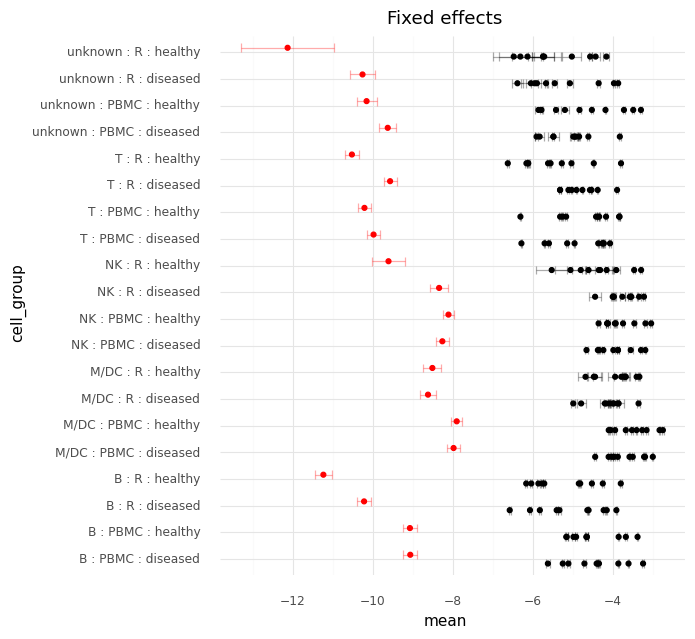

<ggplot: (-9223371919358769460)>

In [6]:
p.options.figure_size = 6, 7
the_plot = (
    p.ggplot(p.aes(x = 'mean', y = 'cell_group'), tfp_fixed_effects)
    + p.geom_point(position = p.position_nudge(y = -0.165))
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        position = p.position_nudge(y = -0.165)
    )
    + p.geom_point(color = 'red', position = p.position_nudge(y = 0.165), data = lme4_fixed_effects)
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        color = 'red',
        position = p.position_nudge(y = 0.165),
        data = lme4_fixed_effects
    )
    + p.theme_minimal()
    + p.labs(title = 'Fixed effects')
)

p.ggsave(the_plot, '1_fe.pdf')
the_plot

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 2_re.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


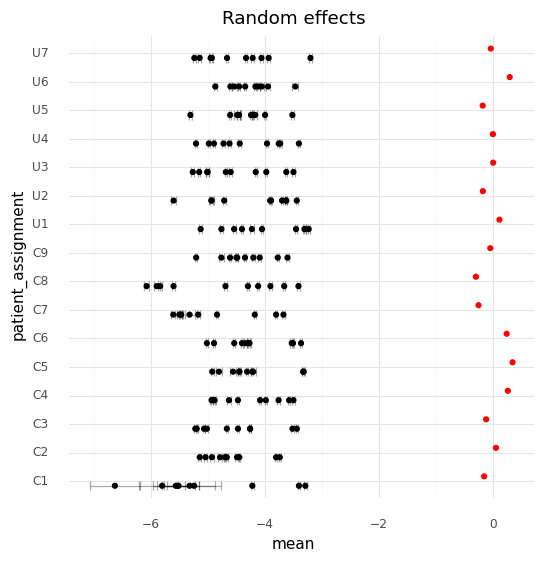

<ggplot: (-9223371919358441568)>

In [7]:
p.options.figure_size = 6, 6
the_plot = (
    p.ggplot(p.aes(x = 'mean', y = 'patient_assignment'), tfp_random_effects)
    + p.geom_point(position = p.position_nudge(y = -0.165))
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        position = p.position_nudge(y = -0.165)
    )
    + p.geom_point(color = 'red', position = p.position_nudge(y = 0.165), data = lme4_random_effects)
    + p.theme_minimal()
    + p.labs(title = 'Random effects')
)

p.ggsave(the_plot, '2_re.pdf')
the_plot

In [8]:
tfp_random_effects.groupby('fit_number')['mean'].mean()

fit_number
1    -4.557634
10   -4.514714
2    -4.752728
3    -4.381244
4    -4.292286
5    -4.386203
6    -4.350273
7    -4.409777
8    -4.278566
9    -4.544211
Name: mean, dtype: float64

In [9]:
lme4_random_effects[['mean']].mean()

mean    0.000819
dtype: float64

In [10]:
# Move TFP RE mean to FE

In [11]:
fes = []
res = []
for fname in glob('tfp/run*/fixed_effects.csv'):
    fit_number = fname.split('run')[-1].split('\\')[0]
    fe = pd.read_csv(fname, index_col = 0)
    fe['fit_number'] = fit_number
    
    re = pd.read_csv(fname.replace('fixed', 'random'))
    re['fit_number'] = fit_number
    fe['mean'] += re['mean'].mean()
    re['mean'] -= re['mean'].mean()
    
    fes.append(fe)
    res.append(re)
    
tfp_fixed_effects = pd.concat(fes)
tfp_random_effects = pd.concat(res)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 7 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 3_fe.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


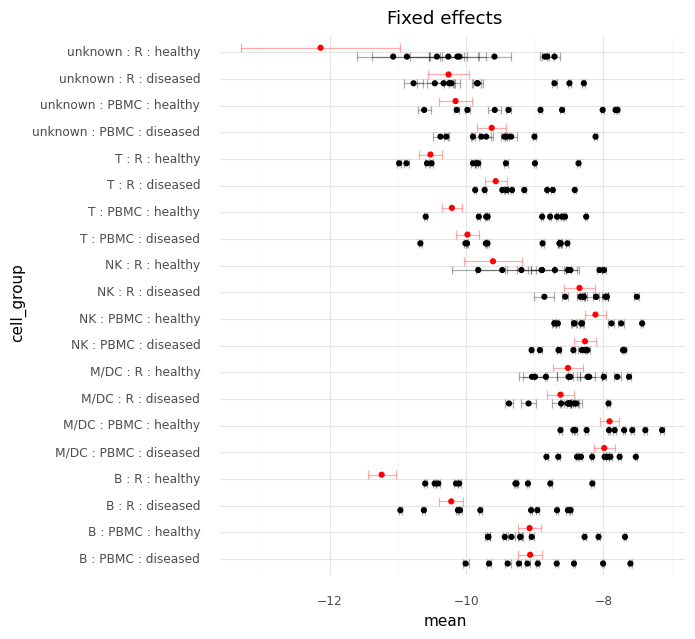

<ggplot: (-9223371919361416612)>

In [14]:
p.options.figure_size = 6, 7
the_plot = (
    p.ggplot(p.aes(x = 'mean', y = 'cell_group'), tfp_fixed_effects)
    + p.geom_point(position = p.position_nudge(y = -0.165))
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        position = p.position_nudge(y = -0.165)
    )
    + p.geom_point(color = 'red', position = p.position_nudge(y = 0.165), data = lme4_fixed_effects)
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        color = 'red',
        position = p.position_nudge(y = 0.165),
        data = lme4_fixed_effects
    )
    + p.theme_minimal()
    + p.labs(title = 'Fixed effects')
)

p.ggsave(the_plot, '3_fe.pdf')
the_plot

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6 x 6 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 4_re.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


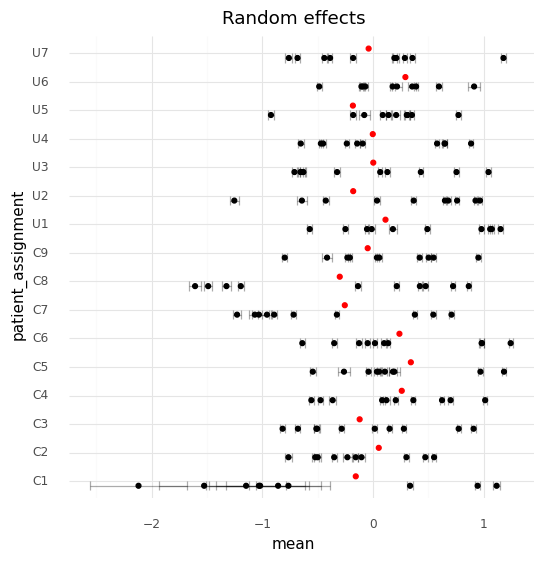

<ggplot: (-9223371919358104756)>

In [15]:
p.options.figure_size = 6, 6
the_plot = (
    p.ggplot(p.aes(x = 'mean', y = 'patient_assignment'), tfp_random_effects)
    + p.geom_point(position = p.position_nudge(y = -0.165))
    + p.geom_errorbarh(
        p.aes(xmin = 'mean - 2 * std', xmax = 'mean + 2 * std'),
        height = 0.33,
        alpha = 0.33,
        position = p.position_nudge(y = -0.165)
    )
    + p.geom_point(color = 'red', position = p.position_nudge(y = 0.165), data = lme4_random_effects)
    + p.theme_minimal()
    + p.labs(title = 'Random effects')
)

p.ggsave(the_plot, '4_re.pdf')
the_plot